# Assignment 1 #
Karthik Karavatt
2061996
5

In [1]:
import cv2 as cv

# Read the image
img = cv.imread("digits.png")
# Convert the image to grayscale
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## Task 2.1 Data Preparation 

### 2.1.1
Split the image into 5000 images of size 20x20 pixels each. Each image contains a digit.
Store this data in a numpy array

We know the digit is 20x20 pixels. So we can split the image into 5000 images of size 20x20 pixels each.
As the image is 1000x500 pixels, we can split the image into 50 rows and 100 columns.

In [2]:
import numpy as np

# Split the image into 5000 cells of size 20x20 pixels each
data_cells = np.array([np.hsplit(row, 100) for row in np.vsplit(img, 50)])

data = np.array(data_cells)

### 2.1.2
Split the data into training and test sets. Use the first 1000 images for training and the rest for testing.
Every 5th row is a different digit, there are 5 rows of each digit and the digits go up to 9, we can use one row of each digit for training and the rest for testing. So we take one row from every 5 rows for training and the rest for testing
.

In [3]:
# Select every 5th row for testing
test_data = data[::5]

# Select all but every 5th row for training
train_data = np.delete(data, np.arange(0, data.shape[0], 5), axis=0)

### 2.1.3
Write the images to a folders. The images should be written to the train and test directories.

In [4]:
import os
import shutil
import cv2 as cv

# Define your directory paths
train_dir = 'train'
test_dir = 'test'

# If the directories already exist, remove them and their contents
for dir_path in [train_dir, test_dir]:
    if os.path.exists(dir_path) and os.path.isdir(dir_path):
        shutil.rmtree(dir_path)

    # Create the directories
    os.makedirs(dir_path)

# Save your train and test data to the respective directories as JPEGs

for i in range(train_data.shape[0]):
    for j in range(train_data.shape[1]):
        digit = i // 4  # The digit is determined by integer division of the row index by 4
        row = i % 4  # The row is determined by the remainder of the row index divided by 4
        cv.imwrite(os.path.join(train_dir, f'train_{digit}_{row}_{j}.jpg'), train_data[i, j])

for i in range(test_data.shape[0]):
    for j in range(test_data.shape[1]):
        cv.imwrite(os.path.join(test_dir, f'test_{i}_{j}.jpg'), test_data[i, j])


def load_images_to_array(path):
    # Get the list of files in the directory
    files = os.listdir(path)
    # Sort the files
    files.sort()
    # Load the images into a numpy array
    images = np.array([cv.imread(os.path.join(path, file), cv.IMREAD_GRAYSCALE) for file in files])
    return images

## Task 2.2: Nearest Neighbor method for image classification 

In this task we will use the k - nearest neighbor method to classify the images in the test set.
### 2.2
label the images in the training set. The labels should be the digit in the image.

In [5]:
# Load the images from the train and test directories into numpy arrays
train_data = load_images_to_array(train_dir)
test_data = load_images_to_array(test_dir)

# Reshape the training data to be 2D and convert to float32
train_data = train_data.reshape(-1, 400)
train_data = np.float32(train_data)

# Reshape the test data to be 2D and convert to float32
test_data = test_data.reshape(-1, 400)
test_data = np.float32(test_data)

# Create the labels for the training data
train_labels = np.repeat(np.arange(10), 400).reshape(-1, 1)
# Create the labels for the test data
test_labels = np.repeat(np.arange(10), 100).reshape(-1, 1)


### 2.3 Implement the k - nearest neighbor method to classify the images in the test set.

In [6]:
def get_accuracy_and_confusion_matrix(k):
    # Create the kNN model
    knn = cv.ml.KNearest_create()
    knn.train(train_data, cv.ml.ROW_SAMPLE, train_labels)
    ret, result, neighbours, dist = knn.findNearest(test_data, k=k)
    # Calculate the accuracy of classification
    matches = np.equal(result, test_labels)
    correct = np.count_nonzero(matches)
    accuracy = correct * (100.0 / result.size)
    print(f'Accuracy is {accuracy}%')

    # Convert the test labels and the predicted results to integer type
    test_labels_int = test_labels.astype(int)
    result_int = result.astype(int)

    # Get the number of classes
    num_classes = len(np.unique(test_labels_int))

    # Initialize the confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.int32)

    # Populate the confusion matrix
    for j in range(len(test_labels_int)):
        confusion_matrix[test_labels_int[j][0]][result_int[j][0]] += 1

    # Print the confusion matrix in latex format for markdown
    print(f'k = {k}')
    print(r'$\begin{bmatrix}')
    for row in confusion_matrix:
        for i, col in enumerate(row):
            if i == len(row) - 1:
                print(f'{col}\\\\')
            else:
                print(f'{col}&', end='')
    print(r'\end{bmatrix}$')
    print('\n')


get_accuracy_and_confusion_matrix(3)


Accuracy is 93.10000000000001%
k = 3
$\begin{bmatrix}
100&0&0&0&0&0&0&0&0&0\\
0&98&1&1&0&0&0&0&0&0\\
2&5&88&0&0&1&0&4&0&0\\
1&0&2&91&0&3&1&2&0&0\\
0&1&0&0&90&1&1&0&0&7\\
0&2&1&6&0&88&1&0&0&2\\
1&0&0&0&0&0&99&0&0&0\\
0&3&0&0&1&0&0&92&0&4\\
0&4&1&1&0&0&0&0&93&1\\
4&0&0&1&2&0&0&1&0&92\\
\end{bmatrix}$


| k  | Accuracy           |
|----|--------------------|
| 1  | 92.60000000000001% |
| 2  | 92.2%              |
| 3  | 93.10000000000001% |
| 4  | 92.7%              |
| 5  | 92.10000000000001% |
| 6  | 92.0%              |
| 7  | 92.0%              |
| 8  | 91.9%              |
| 9  | 91.80000000000001% |
| 10 | 92.0%              |
| 11 | 90.9%              |
| 12 | 90.9%              |
| 13 | 90.80000000000001% |
| 14 | 90.80000000000001% |
| 15 | 90.60000000000001% |
| 16 | 90.10000000000001% |
| 17 | 90.2%              |
| 18 | 90.30000000000001% |
| 19 | 90.10000000000001% |
| 20 | 89.9%              |


k = 1
$\begin{bmatrix}
98&0&2&0&0&0&0&0&0&0\\
0&97&2&1&0&0&0&0&0&0\\
1&3&86&3&1&1&0&4&0&1\\
0&0&0&93&0&2&1&2&2&0\\
0&0&0&0&90&1&0&1&0&8\\
0&1&1&4&0&89&1&0&0&4\\
1&0&0&0&1&1&97&0&0&0\\
0&3&0&0&1&0&0&91&0&5\\
0&2&0&2&0&1&0&0&95&0\\
3&0&0&0&2&0&1&4&0&90\\
\end{bmatrix}$


k = 2
$\begin{bmatrix}
100&0&0&0&0&0&0&0&0&0\\
0&98&2&0&0&0&0&0&0&0\\
3&5&87&0&0&1&0&4&0&0\\
1&0&3&91&0&1&1&2&1&0\\
0&1&0&0&95&0&0&2&0&2\\
0&1&1&9&2&86&0&0&0&1\\
1&1&0&0&1&2&95&0&0&0\\
0&4&0&0&2&0&0&93&0&1\\
0&5&1&1&0&3&0&0&90&0\\
4&0&0&1&4&0&0&4&0&87\\
\end{bmatrix}$


k = 3
$\begin{bmatrix}
100&0&0&0&0&0&0&0&0&0\\
0&98&1&1&0&0&0&0&0&0\\
2&5&88&0&0&1&0&4&0&0\\
1&0&2&91&0&3&1&2&0&0\\
0&1&0&0&90&1&1&0&0&7\\
0&2&1&6&0&88&1&0&0&2\\
1&0&0&0&0&0&99&0&0&0\\
0&3&0&0&1&0&0&92&0&4\\
0&4&1&1&0&0&0&0&93&1\\
4&0&0&1&2&0&0&1&0&92\\
\end{bmatrix}$


k = 4
$\begin{bmatrix}
100&0&0&0&0&0&0&0&0&0\\
0&97&1&1&1&0&0&0&0&0\\
2&7&86&0&0&1&0&4&0&0\\
1&0&2&92&0&1&1&2&1&0\\
0&1&0&0&93&0&1&0&0&5\\
0&2&1&4&0&90&1&0&0&2\\
1&1&0&0&0&0&98&0&0&0\\
0&5&0&0&1&0&0&91&0&3\\
0&3&0&2&0&0&0&0&94&1\\
1&0&1&2&5&0&2&3&0&86\\
\end{bmatrix}$


k = 5
$\begin{bmatrix}
99&0&0&0&0&0&1&0&0&0\\
0&98&0&1&0&1&0&0&0&0\\
2&6&86&0&0&1&0&5&0&0\\
1&0&2&91&0&2&1&2&1&0\\
0&2&0&0&90&1&2&0&0&5\\
0&1&1&5&0&88&2&0&0&3\\
1&1&0&0&0&0&98&0&0&0\\
0&4&0&0&1&0&0&92&0&3\\
0&3&1&3&0&1&1&0&90&1\\
1&0&1&1&2&0&2&4&0&89\\
\end{bmatrix}$


k = 6
$\begin{bmatrix}
99&0&0&0&0&0&1&0&0&0\\
0&98&0&1&0&1&0&0&0&0\\
3&7&86&0&0&0&0&4&0&0\\
0&0&2&92&0&1&1&2&1&1\\
0&2&0&0&92&0&2&0&0&4\\
0&1&1&6&1&88&1&0&0&2\\
1&1&0&0&0&0&98&0&0&0\\
0&5&0&0&1&0&0&90&0&4\\
0&4&1&2&0&2&1&0&89&1\\
3&0&0&2&2&1&0&4&0&88\\
\end{bmatrix}$


k = 7
$\begin{bmatrix}
98&0&0&0&0&2&0&0&0&0\\
0&98&1&1&0&0&0&0&0&0\\
2&7&84&0&0&1&0&6&0&0\\
0&0&2&92&0&1&1&2&1&1\\
0&2&0&0&92&0&2&0&0&4\\
0&1&1&5&0&88&2&0&0&3\\
1&1&0&0&0&0&98&0&0&0\\
0&5&0&0&0&0&0&92&0&3\\
0&4&0&4&0&1&1&0&89&1\\
2&0&0&1&2&1&0&5&0&89\\
\end{bmatrix}$


k = 8
$\begin{bmatrix}
99&0&0&0&0&0&1&0&0&0\\
0&97&2&0&1&0&0&0&0&0\\
2&8&85&0&0&1&0&4&0&0\\
0&0&2&92&0&1&1&2&1&1\\
0&3&0&0&90&0&2&0&0&5\\
0&1&1&7&0&87&1&0&0&3\\
1&1&0&0&0&0&98&0&0&0\\
0&5&0&0&0&0&0&92&0&3\\
0&4&0&2&0&1&1&0&91&1\\
3&0&0&1&2&0&1&5&0&88\\
\end{bmatrix}$


k = 9
$\begin{bmatrix}
97&0&0&0&0&2&1&0&0&0\\
0&98&0&1&0&1&0&0&0&0\\
2&9&84&0&0&1&0&4&0&0\\
0&0&2&91&0&2&1&2&1&1\\
0&3&0&0&90&0&2&0&0&5\\
0&1&1&6&0&88&1&0&0&3\\
1&1&0&0&0&0&98&0&0&0\\
0&5&0&0&0&0&0&92&0&3\\
0&4&0&2&0&2&1&0&90&1\\
2&0&0&1&1&1&0&5&0&90\\
\end{bmatrix}$


k = 10
$\begin{bmatrix}
98&0&0&0&0&1&1&0&0&0\\
0&98&0&1&0&1&0&0&0&0\\
2&9&84&0&0&1&0&4&0&0\\
1&0&2&92&0&1&1&2&0&1\\
0&3&0&0&90&0&2&0&0&5\\
0&1&1&7&1&87&1&0&0&2\\
1&1&0&0&0&0&98&0&0&0\\
0&5&0&0&0&0&0&92&0&3\\
0&4&0&2&0&2&1&0&90&1\\
2&0&0&1&1&1&0&4&0&91\\
\end{bmatrix}$


k = 11
$\begin{bmatrix}
96&0&0&0&0&2&2&0&0&0\\
0&98&0&0&0&1&0&0&0&1\\
3&9&82&0&0&1&0&5&0&0\\
1&1&1&90&0&2&1&2&0&2\\
0&3&0&0&90&0&2&0&0&5\\
0&1&1&7&0&86&1&0&1&3\\
1&1&0&0&0&0&98&0&0&0\\
0&6&0&0&1&0&0&90&0&3\\
0&4&0&2&0&2&1&0&90&1\\
2&0&0&1&2&1&0&5&0&89\\
\end{bmatrix}$


k = 12
$\begin{bmatrix}
96&0&0&0&0&3&1&0&0&0\\
0&97&0&0&1&1&0&0&0&1\\
3&8&82&0&0&1&0&6&0&0\\
1&1&2&90&0&2&1&2&0&1\\
0&4&0&0&88&1&2&0&0&5\\
0&1&1&5&0&89&1&0&0&3\\
1&1&0&0&0&0&98&0&0&0\\
0&6&0&0&1&0&0&90&0&3\\
0&4&0&2&0&2&1&0&90&1\\
2&0&0&1&3&0&1&4&0&89\\
\end{bmatrix}$


k = 13
$\begin{bmatrix}
96&0&0&0&0&2&2&0&0&0\\
0&98&0&0&0&1&0&0&0&1\\
3&9&80&0&0&1&0&7&0&0\\
1&1&1&91&0&1&1&3&0&1\\
0&4&0&0&90&0&2&0&0&4\\
0&1&1&5&1&88&1&0&0&3\\
1&1&0&0&0&0&98&0&0&0\\
0&6&0&0&0&0&0&91&0&3\\
0&3&0&4&0&3&1&0&88&1\\
2&0&1&1&2&0&1&5&0&88\\
\end{bmatrix}$


k = 14
$\begin{bmatrix}
96&0&0&0&0&2&2&0&0&0\\
0&98&0&0&0&1&0&1&0&0\\
2&9&81&0&0&1&0&6&1&0\\
1&1&1&91&0&1&1&3&0&1\\
0&4&0&0&87&1&2&0&0&6\\
0&1&1&5&1&88&1&0&0&3\\
1&1&0&0&0&0&98&0&0&0\\
0&6&0&0&0&0&0&91&0&3\\
0&3&0&3&0&3&1&0&89&1\\
2&0&0&1&3&0&1&4&0&89\\
\end{bmatrix}$


k = 15
$\begin{bmatrix}
96&0&0&0&0&2&2&0&0&0\\
0&97&0&0&1&1&0&0&0&1\\
2&9&81&0&0&1&0&6&0&1\\
1&1&1&91&0&1&1&3&0&1\\
0&4&0&0&90&0&2&0&0&4\\
0&1&1&6&0&86&2&0&0&4\\
1&1&0&0&0&0&98&0&0&0\\
0&7&0&0&1&0&0&88&0&4\\
0&3&0&3&0&3&1&0&89&1\\
2&0&0&1&1&0&1&5&0&90\\
\end{bmatrix}$


k = 16
$\begin{bmatrix}
96&0&0&0&0&2&2&0&0&0\\
0&97&0&0&1&1&0&0&0&1\\
2&9&80&0&0&1&0&6&1&1\\
1&1&1&89&0&2&1&3&0&2\\
0&4&0&0&88&0&2&0&0&6\\
0&1&1&5&0&88&1&0&0&4\\
1&1&0&0&0&1&97&0&0&0\\
0&7&0&0&1&0&0&88&0&4\\
0&5&0&4&0&2&1&0&87&1\\
2&0&0&1&1&0&1&4&0&91\\
\end{bmatrix}$


k = 17
$\begin{bmatrix}
96&0&0&0&0&2&2&0&0&0\\
0&97&0&0&1&1&0&1&0&0\\
3&9&79&0&0&1&0&6&1&1\\
1&1&2&87&0&2&1&3&0&3\\
0&4&0&0&90&0&2&0&0&4\\
0&1&1&6&1&86&2&0&0&3\\
1&1&0&0&0&1&97&0&0&0\\
0&6&0&0&1&0&0&90&0&3\\
0&3&0&3&0&3&1&0&89&1\\
2&0&0&1&1&0&1&4&0&91\\
\end{bmatrix}$


k = 18
$\begin{bmatrix}
96&0&0&0&0&2&2&0&0&0\\
0&97&0&0&1&1&0&1&0&0\\
2&9&81&0&0&1&0&5&1&1\\
1&1&2&85&0&3&1&3&0&4\\
0&4&0&0&90&0&2&0&0&4\\
0&1&1&6&1&87&1&0&0&3\\
1&1&0&0&0&1&97&0&0&0\\
0&6&0&0&1&0&0&90&0&3\\
0&3&0&3&0&3&1&0&89&1\\
2&1&0&1&1&0&1&3&0&91\\
\end{bmatrix}$


k = 19
$\begin{bmatrix}
96&0&0&0&0&2&2&0&0&0\\
0&97&0&0&1&1&0&1&0&0\\
2&9&81&0&0&1&0&5&1&1\\
1&1&2&85&0&3&1&3&0&4\\
0&4&0&0&91&0&2&0&0&3\\
0&1&1&6&1&86&2&0&0&3\\
1&1&0&0&0&1&97&0&0&0\\
0&7&0&0&1&0&0&89&0&3\\
0&3&0&3&0&3&1&0&89&1\\
2&1&0&1&1&0&1&4&0&90\\
\end{bmatrix}$


k = 20
$\begin{bmatrix}
96&0&1&0&0&2&1&0&0&0\\
0&97&0&0&1&1&0&0&0&1\\
2&9&81&0&0&1&0&5&1&1\\
1&1&2&85&0&3&1&3&0&4\\
0&4&0&0&90&0&2&0&0&4\\
0&1&1&6&1&87&1&0&0&3\\
1&1&0&0&0&1&97&0&0&0\\
0&7&0&0&1&0&0&89&0&3\\
0&4&0&3&0&4&1&0&87&1\\
2&1&0&1&1&0&1&4&0&90\\
\end{bmatrix}$



### 2.3 Linear classifier for image classification
We will use support vector machines to classify the images in the test set.

In [7]:
## load the data
train_data = load_images_to_array(train_dir)
test_data = load_images_to_array(test_dir)

# create the labels
train_labels = np.repeat(np.arange(10), 400).reshape(-1, 1)
test_labels = np.repeat(np.arange(10), 100).reshape(-1, 1)

# hyper parameters
c = 0.1
iterations = 1000
gamma = 0.001

# Feature Scaling
train_data = cv.normalize(train_data, train_data, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
test_data = cv.normalize(test_data, test_data, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)

# reshape the data
train_data = train_data.reshape(-1, 400)
test_data = test_data.reshape(-1, 400)

svm = cv.ml.SVM_create()
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setType(cv.ml.SVM_C_SVC)
svm.setC(c)
svm.setGamma(gamma)
svm.setTermCriteria((cv.TERM_CRITERIA_MAX_ITER, iterations, 1e-6))  # 
svm.train(train_data, cv.ml.ROW_SAMPLE, train_labels)

# predict the labels
result = svm.predict(test_data)[1]

# calculate the accuracy
matches = np.equal(result, test_labels)
correct = np.count_nonzero(matches)
accuracy = correct * (100.0 / result.size)
print(f'Accuracy is {accuracy}% ')

Accuracy is 90.80000000000001% 


| C     | Gamma | Iterations | Accuracy           |
|-------|-------|------------|--------------------|
| 0.001 | 0.001 | 1000       | 83.4%              |
| 0.001 | 0.001 | 2000       | 83.4%              |
| 0.001 | 0.001 | 3000       | 83.4%              |
| 0.001 | 0.01  | 1000       | 83.4%              |
| 0.001 | 0.01  | 2000       | 83.4%              |
| 0.001 | 0.01  | 3000       | 83.4%              |
| 0.001 | 0.1   | 1000       | 83.4%              |
| 0.001 | 0.1   | 2000       | 83.4%              |
| 0.001 | 0.1   | 3000       | 83.4%              |
| 0.001 | 1     | 1000       | 83.4%              |
| 0.001 | 1     | 2000       | 83.4%              |
| 0.001 | 1     | 3000       | 83.4%              |
| 0.01  | 0.001 | 1000       | 90.7%              |
| 0.01  | 0.001 | 2000       | 90.7%              |
| 0.01  | 0.001 | 3000       | 90.7%              |
| 0.01  | 0.01  | 1000       | 90.7%              |
| 0.01  | 0.01  | 2000       | 90.7%              |
| 0.01  | 0.01  | 3000       | 90.7%              |
| 0.01  | 0.1   | 1000       | 90.7%              |
| 0.01  | 0.1   | 2000       | 90.7%              |
| 0.01  | 0.1   | 3000       | 90.7%              |
| 0.01  | 1     | 1000       | 90.7%              |
| 0.01  | 1     | 2000       | 90.7%              |
| 0.01  | 1     | 3000       | 90.7%              |
| 0.1   | 0.001 | 1000       | 90.80000000000001% |
| 0.1   | 0.001 | 2000       | 90.80000000000001% |
| 0.1   | 0.001 | 3000       | 90.80000000000001% |
| 0.1   | 0.01  | 1000       | 90.80000000000001% |
| 0.1   | 0.01  | 2000       | 90.80000000000001% |
| 0.1   | 0.01  | 3000       | 90.80000000000001% |
| 0.1   | 0.1   | 1000       | 90.80000000000001% |
| 0.1   | 0.1   | 2000       | 90.80000000000001% |
| 0.1   | 0.1   | 3000       | 90.80000000000001% |
| 0.1   | 1     | 1000       | 90.80000000000001% |
| 0.1   | 1     | 2000       | 90.80000000000001% |
| 0.1   | 1     | 3000       | 90.80000000000001% |
| 1     | 0.001 | 1000       | 90.10000000000001% |
| 1     | 0.001 | 2000       | 90.0%              |
| 1     | 0.001 | 3000       | 90.10000000000001% |
| 1     | 0.01  | 1000       | 90.10000000000001% |
| 1     | 0.01  | 2000       | 90.0%              |
| 1     | 0.01  | 3000       | 90.10000000000001% |
| 1     | 0.1   | 1000       | 90.10000000000001% |
| 1     | 0.1   | 2000       | 90.0%              |
| 1     | 0.1   | 3000       | 90.10000000000001% |
| 1     | 1     | 1000       | 90.10000000000001% |
| 1     | 1     | 2000       | 90.0%              |
| 1     | 1     | 3000       | 90.10000000000001% |
| 10    | 0.001 | 1000       | 89.60000000000001% |
| 10    | 0.001 | 2000       | 89.5%              |
| 10    | 0.001 | 3000       | 89.30000000000001% |
| 10    | 0.01  | 1000       | 89.60000000000001% |
| 10    | 0.01  | 2000       | 89.5%              |
| 10    | 0.01  | 3000       | 89.30000000000001% |
| 10    | 0.1   | 1000       | 89.60000000000001% |
| 10    | 0.1   | 2000       | 89.5%              |
| 10    | 0.1   | 3000       | 89.30000000000001% |
| 10    | 1     | 1000       | 89.60000000000001% |
| 10    | 1     | 2000       | 89.5%              |
| 10    | 1     | 3000       | 89.30000000000001% |

Best accuracy is 90.80000000000001% with parameters {'C': 0.1, 'gamma': 0.001, 'iterations': 1000}
The accuracy is lower than the k nearest neighbor method when k = 3 

### 2.4 Image classification using a bag of visual words

In [8]:
import os
import shutil

# Organize the images into folders based on their category
def categorize_images(main_directory, new_directory):
    categories = [str(i) for i in range(10)]
    for category in categories:
        # If the directory already exists, delete it
        if os.path.exists(new_directory + '/' + category):
            shutil.rmtree(new_directory + '/' + category)
        # Create the directory
        os.makedirs(new_directory + '/' + category, exist_ok=True)
    for filename in os.listdir(main_directory):
        if filename.startswith('test_') or filename.startswith('train_'):
            category = filename.split('_')[1]
            shutil.copy(main_directory + '/' + filename, new_directory + '/' + category + '/' + filename)

categorize_images('test', 'bov_test')
categorize_images('train', 'bov_train')


#### 2.4.1 load the data

In [9]:
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
import cv2 as cv

def deskew(img):
    SZ= 20
    m = cv.moments(img)
    if abs(m['mu02']) < 1e-2:
        # no deskewing needed.
        return img.copy()
    # Calculate skew based on central momemts.
    skew = m['mu11']/m['mu02']
    # Calculate affine transform to correct skewness.
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    # Apply affine transform
    img = cv.warpAffine(img, M, (SZ, SZ), flags=cv.WARP_INVERSE_MAP | cv.INTER_LINEAR)
    return img


# takes all images and convert them to grayscale. 
# return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        for cat in os.listdir(path):
            img = cv.imread(path + "/" + cat, 0)
            img = ndimage.gaussian_filter(img, sigma=0.824)
            img = cv.normalize(img, None, 0, 255, cv.NORM_MINMAX)
            img = deskew(img)
            category.append(img)
        images[filename] = category
    return images


images = load_images_from_folder('bov_train')  # take all images category by category 
test = load_images_from_folder("bov_test")  # take test images 



#### 2.4.2 Feature extraction

In [10]:
import numpy as np

from sklearn.preprocessing import StandardScaler

# Creates descriptors using sift 
def sift_features(images_bov, features=200):
    sift = cv.SIFT_create(nfeatures=features, contrastThreshold=0.1, edgeThreshold=55)
    descriptor_list_sift = []
    sift_vectors = {}

    for key, value in images_bov.items():
        features = []
        for img_sift in value:
            kp, des = sift.detectAndCompute(img_sift, None)
            #if des is not None:
            descriptor_list_sift.extend(des)
            features.append(des)
                
        sift_vectors[key] = features

    # Normalize the features
    scaler = StandardScaler()
    descriptor_list_sift = scaler.fit_transform(np.array(descriptor_list_sift))

    return descriptor_list_sift, sift_vectors

sifts = sift_features(images)
descriptor_list = sifts[0]
all_bovw_feature = sifts[1]

# Normalize the features
scaler = StandardScaler()
descriptor_list = scaler.fit_transform(np.array(descriptor_list))

test_bovw_feature = sift_features(test)[1]


In [11]:
# A k-means clustering algorithm who takes 2 parameter which is number 
# of cluster(k) and the other is descriptors list(unordered 1d array)
# Returns an array that holds central points.
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_
    return visual_words


# Takes the central points which is visual words    
visual_words = kmeans(150, descriptor_list)

In [12]:
def find_index(image, center):
    count = 0
    ind = 0
    for i in range(len(center)):
        if (i == 0):
            count = distance.euclidean(image, center[i])
            #count = L1_dist(image, center[i])
        else:
            dist = distance.euclidean(image, center[i])
            #dist = L1_dist(image, center[i])
            if (dist < count):
                ind = i
                count = dist
    return ind


# Takes 2 parameters. The first one is a dictionary that holds the descriptors that are separated class by class 
# And the second parameter is an array that holds the central points (visual words) of the k means clustering
# Returns a dictionary that holds the histograms for each images that are separated class by class. 
def image_class(all_bovw, centers):
    dict_feature = {}
    for key, value in all_bovw.items():
        category = []
        for img in value:
            histogram = np.zeros(len(centers))
            if img is not None:
                for each_feature in img:
                    ind = find_index(each_feature, centers)
                    histogram[ind] += 1
                # Normalize the histogram
                histogram /= np.sum(histogram)
            category.append(histogram)
        dict_feature[key] = category
    return dict_feature


# Creates histograms for train data    
bovw_train = image_class(all_bovw_feature, visual_words)
# Creates histograms for test data
bovw_test = image_class(test_bovw_feature, visual_words)

In [13]:
# 1-NN algorithm. We use this for predict the class of test images.
# Takes 2 parameters. images is the feature vectors of train images and tests is the feature vectors of test images
# Returns an array that holds number of test images, number of correctly predicted images and records of class based images respectively
def L1_dist(vec1, vec2):
    return np.linalg.norm(np.subtract(np.array(vec1), np.array(vec2)))    
def knn(images, tests):
    num_test = 0
    correct_predict = 0
    class_based = {}

    for test_key, test_val in tests.items():
        class_based[test_key] = [0, 0]  # [correct, all]
        for tst in test_val:
            predict_start = 0
            #print(test_key)
            minimum = 0
            key = "a"  #predicted
            for train_key, train_val in images.items():
                for train in train_val:
                    if (predict_start == 0):
                        minimum = distance.euclidean(tst, train)
                        #minimum = L1_dist(tst,train)
                        key = train_key
                        predict_start += 1
                    else:
                        dist = distance.euclidean(tst, train)
                        #dist = L1_dist(tst,train)
                        if (dist < minimum):
                            minimum = dist
                            key = train_key

            if (test_key == key):
                correct_predict += 1
                class_based[test_key][0] += 1
            num_test += 1
            class_based[test_key][1] += 1
            #print(minimum)
    return [num_test, correct_predict, class_based]


# Call the knn function    
results_bowl = knn(bovw_train, bovw_test)

In [14]:
 #Calculates the average accuracy and class based accuracies.  
def accuracy(results):
    avg_accuracy = (results[1] / results[0]) * 100
    print("Average accuracy: %" + str(avg_accuracy))
    print("\nClass based accuracies: \n")
    for key, value in results[2].items():
        acc = (value[0] / value[1]) * 100
        print(key + " : %" + str(acc))


# sort the dictionary by key
results_bowl[2] = dict(sorted(results_bowl[2].items()))
# Calculates the accuracies and write the results to the console.       
accuracy(results_bowl) 

Average accuracy: %78.9

Class based accuracies: 

0 : %95.0
1 : %95.0
2 : %73.0
3 : %79.0
4 : %85.0
5 : %68.0
6 : %66.0
7 : %81.0
8 : %81.0
9 : %66.0


### 2.5 Image classification using convolutional neural networks
#### 2.5.1 import the libraries

In [37]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *


In [38]:
from fastai.vision.all import *

# path to your training data
path = Path('train')

# get image files in the training path
files = get_image_files(path)

# label function based on filename
def label_func(f): 
    filename = f.name if isinstance(f, Path) else f
    return filename.split('_')[1]

# create the dataloaders for training data
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

# Create a cnn_learner
learn = cnn_learner(dls, resnet34, metrics=accuracy)

# Train the model
learn.fit_one_cycle(5)


/home/kk/.local/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):
/home/kk/.local/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/kk/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kk/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34

In [45]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        86
           1       0.97      0.97      0.97        78
           2       0.96      0.91      0.93        77
           3       0.96      0.95      0.96        83
           4       0.98      1.00      0.99        82
           5       0.95      0.93      0.94        88
           6       0.96      0.99      0.97        74
           7       0.95      0.95      0.95        65
           8       0.93      0.97      0.95        73
           9       0.98      0.98      0.98        94

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.97      0.96      0.96       800


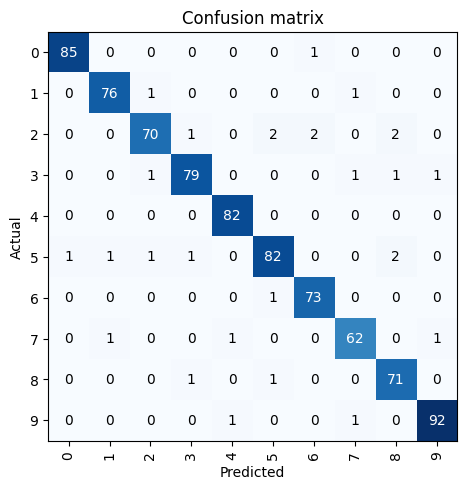

In [46]:
interp.plot_confusion_matrix()

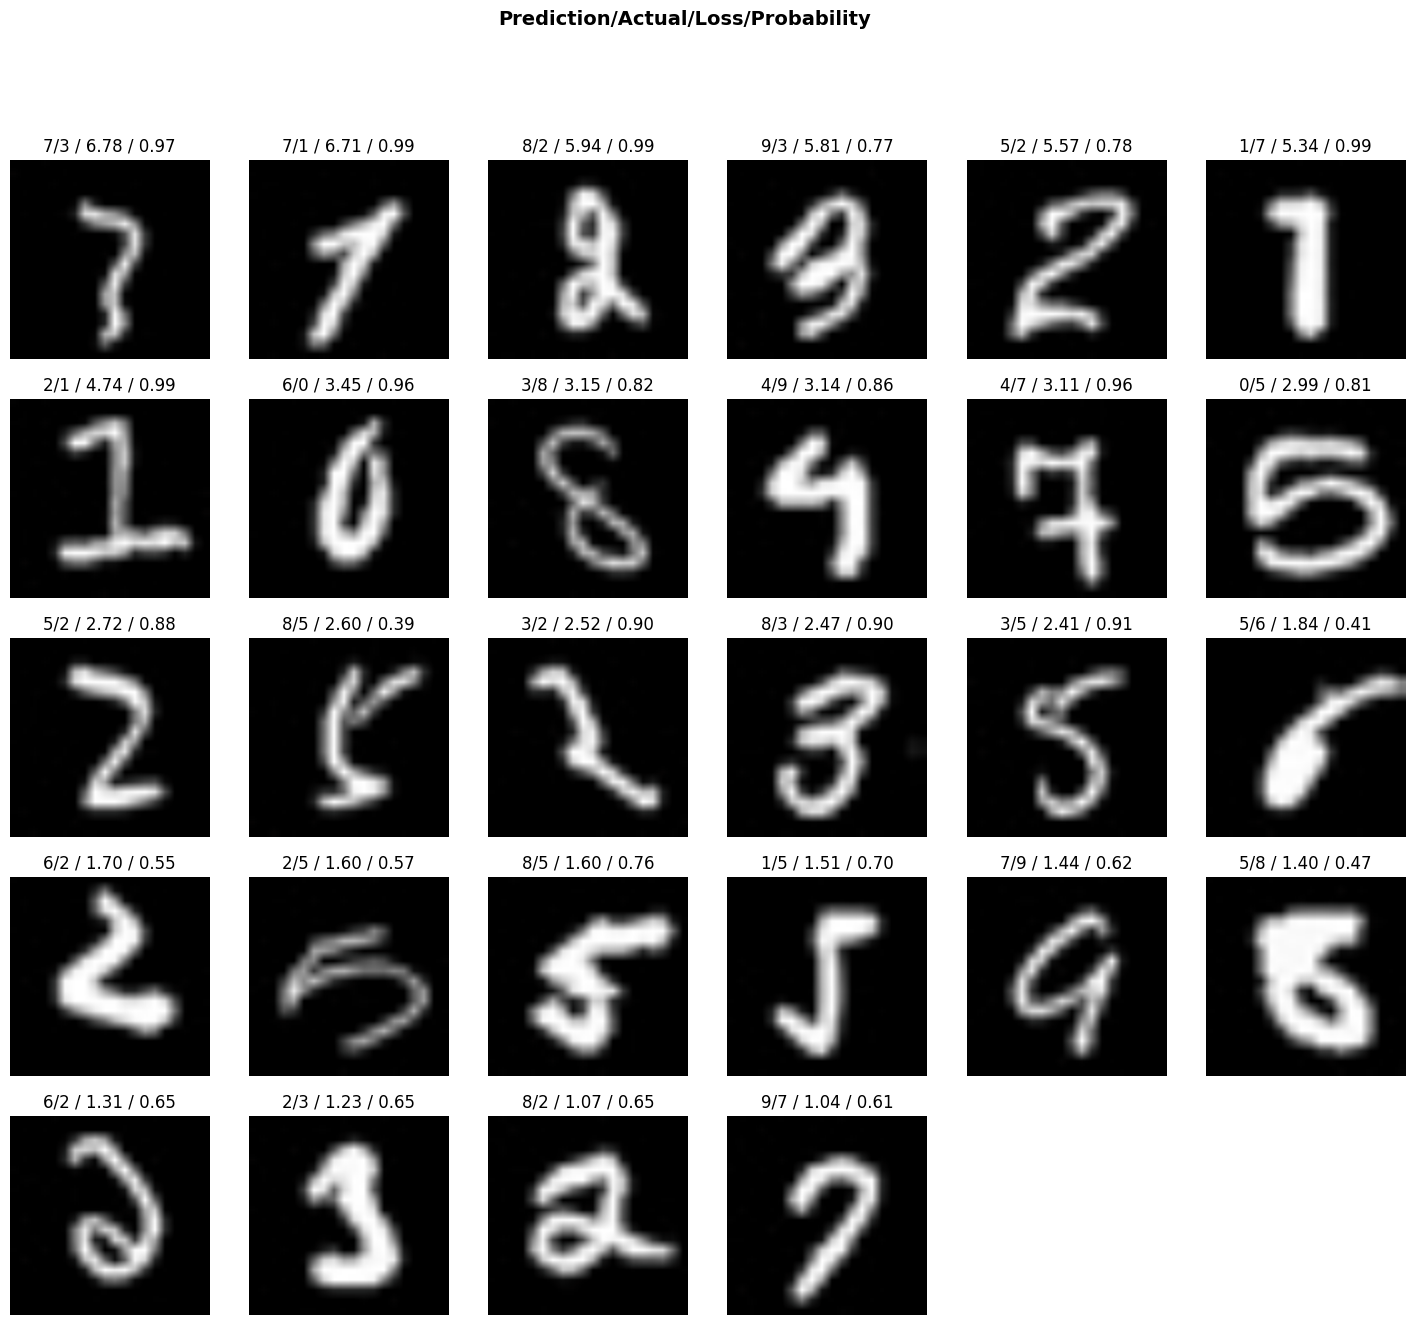

In [54]:
matrix = interp.confusion_matrix()
losses = np.sum(matrix) - np.trace(matrix)
# Plot top losses
interp.plot_top_losses(losses, nrows=5)